<a href="https://colab.research.google.com/github/Munazza-Farees/NITW-SIP2025-Project/blob/main/AKN_FGD_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load dataset
URL = '/content/drive/MyDrive/Colab Notebooks/Client1 (copy).csv'
data = pd.read_csv(URL)
data.head()

,Time,Source,Destination,Protocol,Length,Flags,Inter_Arrival_Time,Flow,Time_min,Time_max,...,Connection_Duration,Packet_Rate,Flow_Bytes_Per_Second,Flow_Packets_Per_Second,Forward_Packets,Backward_Packets,Ratio_Fwd_Bwd,Entropy,Packet_Size_Variance,Label
0,1.749548e+09,10.0.0.4,10.0.0.5,TCP,74,0x0002,NaN,10.0.0.4->10.0.0.5,1.749548e+09,1.749548e+09,...,61.056274,192.379902,57291.900970,192.379902,11746,11,1067.818182,1.389165,257925.244948,0
1,1.749548e+09,10.0.0.5,10.0.0.4,TCP,74,0x0012,0.000020,10.0.0.5->10.0.0.4,1.749548e+09,1.749548e+09,...,61.056282,0.180162,12.250992,0.180162,11,11746,0.000936,1.389165,257925.244948,0
2,1.749548e+09,10.0.0.4,10.0.0.5,TCP,67,0x0018,0.010389,10.0.0.4->10.0.0.5,1.749548e+09,1.749548e+09,...,61.056274,192.379902,57291.900970,192.379902,11746,11,1067.818182,1.389165,257925.244948,0
3,1.749548e+09,10.0.0.5,10.0.0.4,TCP,66,0x0010,0.000042,10.0.0.5->10.0.0.4,1.749548e+09,1.749548e+09,...,61.056282,0.180162,12.250992,0.180162,11,11746,0.000936,1.389165,257925.244948,0
4,1.749548e+09,10.0.0.4,10.0.0.5,TCP,66,0x0010,0.000028,10.0.0.4->10.0.0.5,1.749548e+09,1.749548e+09,...,61.056274,192.379902,57291.900970,192.379902,11746,11,1067.818182,1.389165,257925.244948,0


In [ ]:
# Initial exploration

# Finding the percentage of missing values
percentage_missing = ((data.isnull().sum()) * 100) / len(data)

print("Data types:\n",data.dtypes)
print("\nMissing values:\n",data.isnull().sum())
print("\nPercentage Missing:\n", percentage_missing)
print("\nLabel Distribution:\n",data['Label'].value_counts(normalize=True))

Data types:
 Time                       float64
Source                      object
Destination                 object
Protocol                    object
Length                       int64
Flags                       object
Inter_Arrival_Time         float64
Flow                        object
Time_min                   float64
Time_max                   float64
Length_mean                float64
Length_std                 float64
Length_max                   int64
Length_min                   int64
Length_sum                   int64
Inter_Arrival_Time_mean    float64
Inter_Arrival_Time_std     float64
Connection_Duration        float64
Packet_Rate                float64
Flow_Bytes_Per_Second      float64
Flow_Packets_Per_Second    float64
Forward_Packets              int64
Backward_Packets             int64
Ratio_Fwd_Bwd              float64
Entropy                    float64
Packet_Size_Variance       float64
Label                        int64
dtype: object

Missing values:
 Time      

In [ ]:
# Data quality checks
invalid_time = data[data['Time'] < 0]
invalid_length = data[data['Length'] <= 0]

print("Invalid Time Entries:\n",invalid_time)
print("Invalid Length Entries:\n",invalid_length)

Invalid Time Entries:
 Empty DataFrame
Columns: [Time, Source, Destination, Protocol, Length, Flags, Inter_Arrival_Time, Flow, Time_min, Time_max, Length_mean, Length_std, Length_max, Length_min, Length_sum, Inter_Arrival_Time_mean, Inter_Arrival_Time_std, Connection_Duration, Packet_Rate, Flow_Bytes_Per_Second, Flow_Packets_Per_Second, Forward_Packets, Backward_Packets, Ratio_Fwd_Bwd, Entropy, Packet_Size_Variance, Label]
Index: []

[0 rows x 27 columns]
Invalid Length Entries:
 Empty DataFrame
Columns: [Time, Source, Destination, Protocol, Length, Flags, Inter_Arrival_Time, Flow, Time_min, Time_max, Length_mean, Length_std, Length_max, Length_min, Length_sum, Inter_Arrival_Time_mean, Inter_Arrival_Time_std, Connection_Duration, Packet_Rate, Flow_Bytes_Per_Second, Flow_Packets_Per_Second, Forward_Packets, Backward_Packets, Ratio_Fwd_Bwd, Entropy, Packet_Size_Variance, Label]
Index: []

[0 rows x 27 columns]


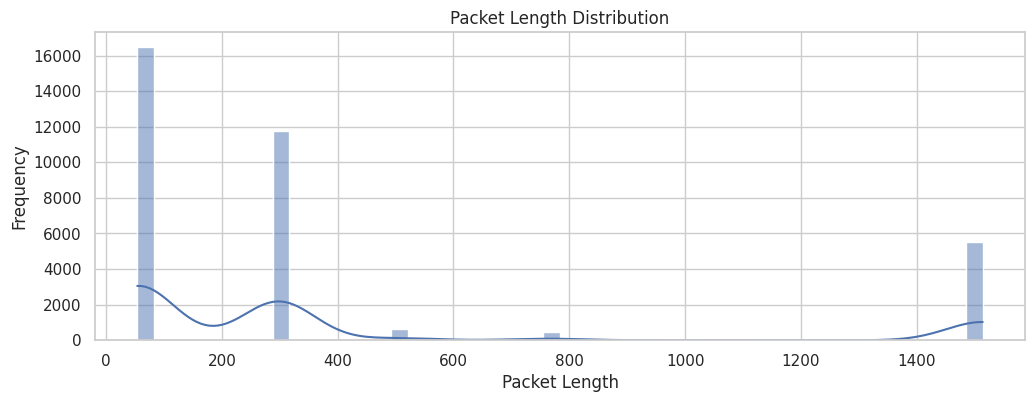

In [ ]:
# Visualize key feature distributions
plt.figure(figsize=(12,4))
sns.histplot(data['Length'], bins=50, kde=True)
plt.title("Packet Length Distribution")
plt.xlabel("Packet Length")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Dataset Preprocessing

# Drop missing values
data = data.dropna()

# Convert columns to appropriate types
# No need to perform if already the types are appropriate
# SettingWithCopyWarning for below statements
# It means that datat is likely a view (subset or slice) of another DataFrame rather than a standalone copy.
# data['Time'] = data['Time'].astype(float)
# data['Label'] = data['Label'].astype(int)

# Instead, one can use below statements
data = data.astype({'Time': float, 'Label': int})

# Encode categorical columns: Protocol and Flags
label_encoder_protocol = LabelEncoder()
data['Protocol'] = label_encoder_protocol.fit_transform(data['Protocol'].astype(str))

label_encoder_flags = LabelEncoder()
data['Flags'] = label_encoder_flags.fit_transform(data['Flags'].astype(str))

print(data['Label'].value_counts())
print(data['Label'].isnull().sum())

Label
0    16563
1     6557
Name: count, dtype: int64
0


In [ ]:
print("\nLabel Distribution:\n",data['Label'].value_counts(normalize=True))


Label Distribution:
 Label
0    0.716393
1    0.283607
Name: proportion, dtype: float64


In [ ]:
# Impute missing values
data.fillna(data.median(numeric_only=True), inplace=True)
data['Protocol'].fillna(data['Protocol'].mode()[0], inplace=True)
data['Flags'].fillna(data['Flags'].mode()[0], inplace=True)

# One-hot encode categorical features
data = pd.get_dummies(data, columns=['Protocol', 'Flags'], prefix=['Protocol', 'Flags'])

# Drop irrelevant features (e.g., Source, Destination)
data = data.drop(columns=['Source', 'Destination'], errors='ignore')

print("Label Distribution:\n", data['Label'].value_counts(normalize=True))
print("Missing Values After Imputation:\n", data.isnull().sum())

Label Distribution:
 Label
0    0.716393
1    0.283607
Name: proportion, dtype: float64
Missing Values After Imputation:
 Time                       0
Length                     0
Inter_Arrival_Time         0
Flow                       0
Time_min                   0
Time_max                   0
Length_mean                0
Length_std                 0
Length_max                 0
Length_min                 0
Length_sum                 0
Inter_Arrival_Time_mean    0
Inter_Arrival_Time_std     0
Connection_Duration        0
Packet_Rate                0
Flow_Bytes_Per_Second      0
Flow_Packets_Per_Second    0
Forward_Packets            0
Backward_Packets           0
Ratio_Fwd_Bwd              0
Entropy                    0
Packet_Size_Variance       0
Label                      0
Protocol_0                 0
Flags_0                    0
Flags_1                    0
Flags_2                    0
Flags_3                    0
Flags_4                    0
Flags_5                    0
Flags_6 

In [ ]:
# Creating Collection Window (CW)
cw_duration = 30 # Test 30 seconds for finer granularity
start_time = data['Time'].min()
data['CW_ID'] = ((data['Time'] - start_time) // cw_duration).astype(int)


In [ ]:
# Stratified Detection Unit (DU) Splitting per CW
# Adaptive DU splitting

data['DU_ID'] = -1 # placeholder
# du_splits = 16  # number of DUs per CW

for cw_id, group in data.groupby("CW_ID"):
    group = group.copy()
    du_splits = min(len(group) // 10, 8)    # Adaptive splits, max 8
    if group['Label'].nunique() == 1 or len(group) < du_splits:
        # Assign the same DU_ID if stratified split not possible
        data.loc[group.index, 'DU_ID'] = f"{cw_id}_0"
    else:
        skf = StratifiedKFold(n_splits=du_splits, shuffle=True, random_state=42)
        for i, (_, test_idx) in enumerate(skf.split(group, group['Label'])):
            du_label = f"{cw_id}_{i}"
            data.loc[group.iloc[test_idx].index, 'DU_ID'] = du_label

# Validate sizes
print("Packets per CW:\n", data.groupby('CW_ID').size().describe())
print("Packets per DU:\n", data.groupby('DU_ID').size().describe())
print("Unique DU_IDs: ", data['DU_ID'].nunique())

Packets per CW:
 count      50.000000
mean      462.400000
std       830.320912
min        56.000000
25%       153.000000
50%       220.000000
75%       372.500000
max      5084.000000
dtype: float64
Packets per DU:
 count    397.000000
mean      58.236776
std      103.144521
min       10.000000
25%       19.000000
50%       28.000000
75%       48.000000
max      636.000000
dtype: float64
Unique DU_IDs:  397


In [ ]:
## Warning: Do not execute this step, or else you will lose many DUs
## Or else, make min_packets to 3 or 1

# Drop DUs with too few packets
min_packets = 3
du_counts = data['DU_ID'].value_counts()
valid_du_ids = du_counts[du_counts >= min_packets].index

# Analyze dropped DUs
dropped_dus = data[~data['DU_ID'].isin(valid_du_ids)]
print("Dropped DUs Label Distribution:\n", dropped_dus['DU_ID'].value_counts())

data = data[data['DU_ID'].isin(valid_du_ids)]
print("Valid DU_IDs after drop: ", len(valid_du_ids))

Dropped DUs Label Distribution:
 Series([], Name: count, dtype: int64)
Valid DU_IDs after drop:  397


In [ ]:
# Add burstiness feature
data['Burstiness'] = data.groupby('DU_ID')['Packet_Rate'].transform(lambda x: x.max() / (x.mean() + 1e-10))

# Refined feature list
features_to_aggregate = [
    'Length', 'Inter_Arrival_Time', 'Connection_Duration', 'Packet_Rate',
    'Flow_Bytes_Per_Second', 'Flow_Packets_Per_Second', 'Forward_Packets',
    'Backward_Packets', 'Ratio_Fwd_Bwd', 'Entropy', 'Packet_Size_Variance', 'Burstiness'
]

# Aggregation
agg_funcs = {col: ['mean', 'std', 'max', 'min'] for col in features_to_aggregate}
agg_funcs['Label'] = lambda x: 1 if (x == 1).mean() >= 0.1 else 0

agg_data = data.groupby('DU_ID').agg(agg_funcs)
agg_data.columns = ['_'.join(col) if isinstance(col, tuple) else col for col in agg_data.columns]
agg_data.reset_index(inplace=True)

# Feature selection (example using correlation)
corr_matrix = agg_data.drop(columns=['DU_ID', 'Label_<lambda>']).corr()
high_corr = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)).stack()
high_corr = high_corr[abs(high_corr) > 0.8]
print("Highly Correlated Features:\n", high_corr)

Highly Correlated Features:
 Length_mean        Length_std                  0.999221
                   Length_max                  0.999445
                   Connection_Duration_mean   -0.999479
                   Connection_Duration_std     0.958251
                   Connection_Duration_min    -0.999446
                                                 ...   
Ratio_Fwd_Bwd_max  Burstiness_max              0.954584
                   Burstiness_min              0.954584
Burstiness_mean    Burstiness_max              1.000000
                   Burstiness_min              1.000000
Burstiness_max     Burstiness_min              1.000000
Length: 280, dtype: float64


In [ ]:
# Feature Scaling

# Dropping DU_ID before scaling
du_ids = agg_data['DU_ID']
labels = agg_data['Label_<lambda>']
agg_data_features = agg_data.drop(columns=['DU_ID', 'Label_<lambda>'])

# Outlier clipping
for col in agg_data_features.columns:
    p1, p99 = agg_data_features[col].quantile([0.01, 0.99])
    agg_data_features[col] = agg_data_features[col].clip(p1, p99)

# Robust scaling
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(agg_data_features)

# Convert back to DataFrame
X_scaled_data = pd.DataFrame(X_scaled, columns=agg_data_features.columns)
X_scaled_data['DU_ID'] = du_ids.values
X_scaled_data['Label'] = labels.values

# Validate scaling
print("Feature aggregation and scaling completed.")
print("Scaled Feature Stats:\n", X_scaled_data.describe())

Feature aggregation and scaling completed.
Scaled Feature Stats:
        Length_mean  Length_std   Length_max  Length_min  \
count   397.000000  397.000000   397.000000       397.0   
mean     51.325289   40.990873    88.261965         0.0   
std     202.684448  161.807700   348.393502         0.0   
min       0.000000    0.000000     0.000000         0.0   
25%       0.000000    0.000000     0.000000         0.0   
50%       0.000000    0.000000     0.000000         0.0   
75%       0.000000    0.000000     0.000000         0.0   
max     878.710988  685.498523  1460.000000         0.0   

       Inter_Arrival_Time_mean  Inter_Arrival_Time_std  \
count               397.000000              397.000000   
mean                  0.240697                0.092312   
std                   0.913448                0.805664   
min                  -0.742184               -1.152399   
25%                  -0.425311               -0.429723   
50%                   0.000000                0.000000

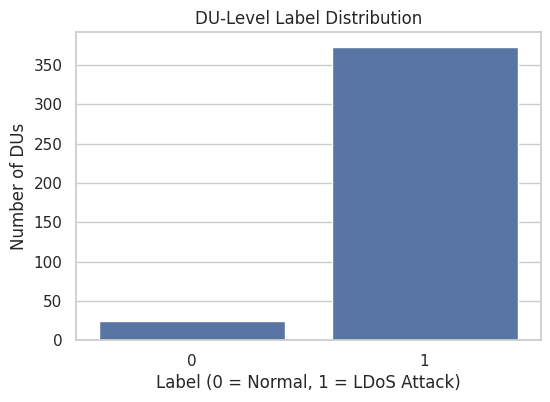

In [ ]:
# Distribution of DU Labels

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='Label', data=X_scaled_data)
plt.title("DU-Level Label Distribution")
plt.xlabel("Label (0 = Normal, 1 = LDoS Attack)")
plt.ylabel("Number of DUs")
plt.show()

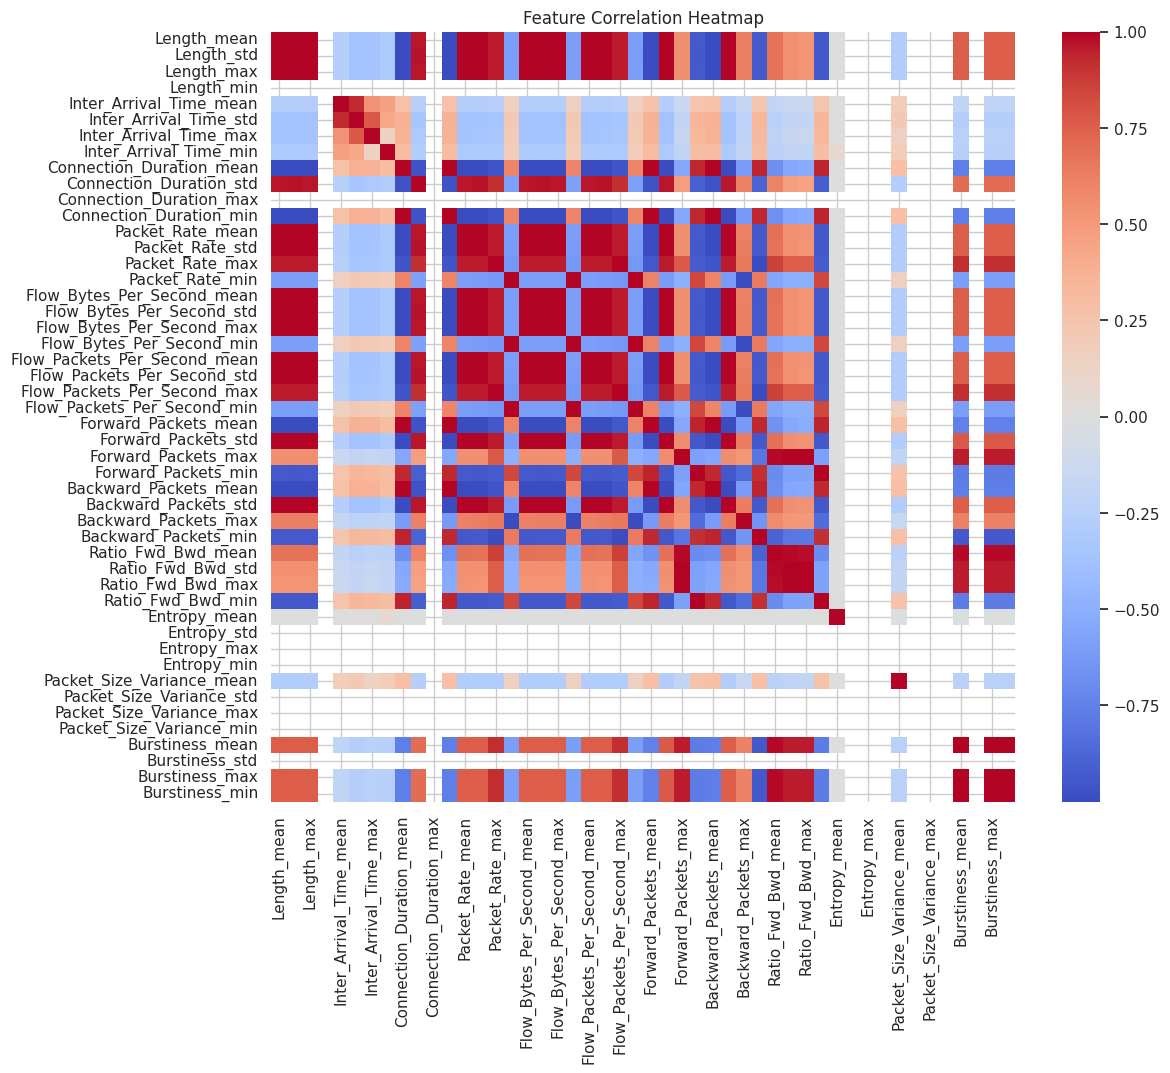

In [ ]:
# Heatmap of Feature Correlations

plt.figure(figsize=(12, 10))
sns.heatmap(X_scaled_data.drop(columns=['DU_ID', 'Label']).corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

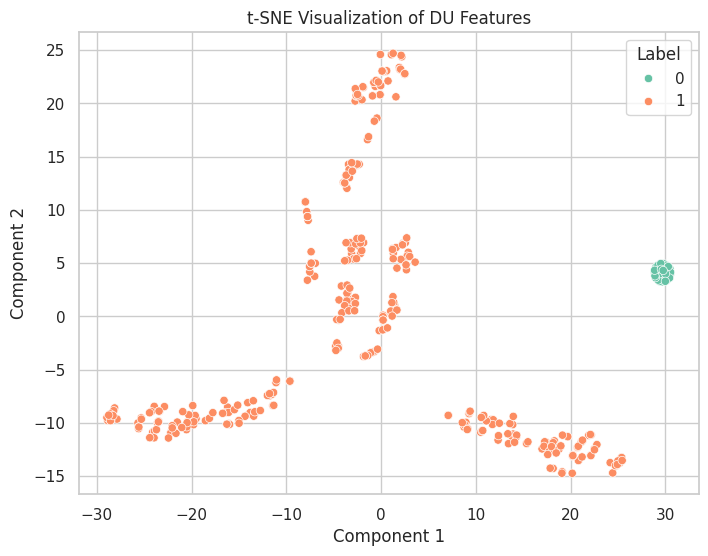

In [ ]:
# t-SNE or PCA for 2D Visualization

# Visualize high-dimensional DU data to see natural clusters or outliers

from sklearn.manifold import TSNE

X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X_scaled_data.drop(columns=['DU_ID', 'Label']))

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=X_scaled_data['Label'], palette='Set2')
plt.title("t-SNE Visualization of DU Features")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend(title="Label", loc="best")
plt.show()


# Replacing TSNE with PCA for faster but less nonlinear results (not recommended)

# from sklearn.decomposition import PCA

# X_pca = PCA(n_components=2, random_state=42).fit_transform(X_scaled_data.drop(columns=['DU_ID', 'Label']))

# plt.figure(figsize=(8, 6))
# sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=X_scaled_data['Label'], palette='Set2')
# plt.title("PCA Visualization of DU Features")
# plt.xlabel("Component 1")
# plt.ylabel("Component 2")
# plt.legend(title="Label", loc="best")
# plt.show()

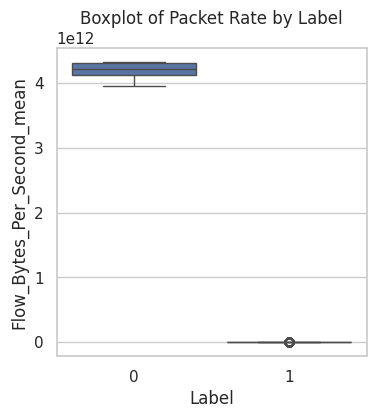

In [ ]:
# Boxplots for Key Features by Label

plt.figure(figsize=(4, 4))
sns.boxplot(x='Label', y='Flow_Bytes_Per_Second_mean', data=X_scaled_data)
plt.title("Boxplot of Packet Rate by Label")
plt.show()

# plt.figure(figsize=(4, 4))
# sns.boxplot(x='Label', y='Protocol', data=data)
# plt.title("Boxplot of Packet Rate by Label")
# plt.show()

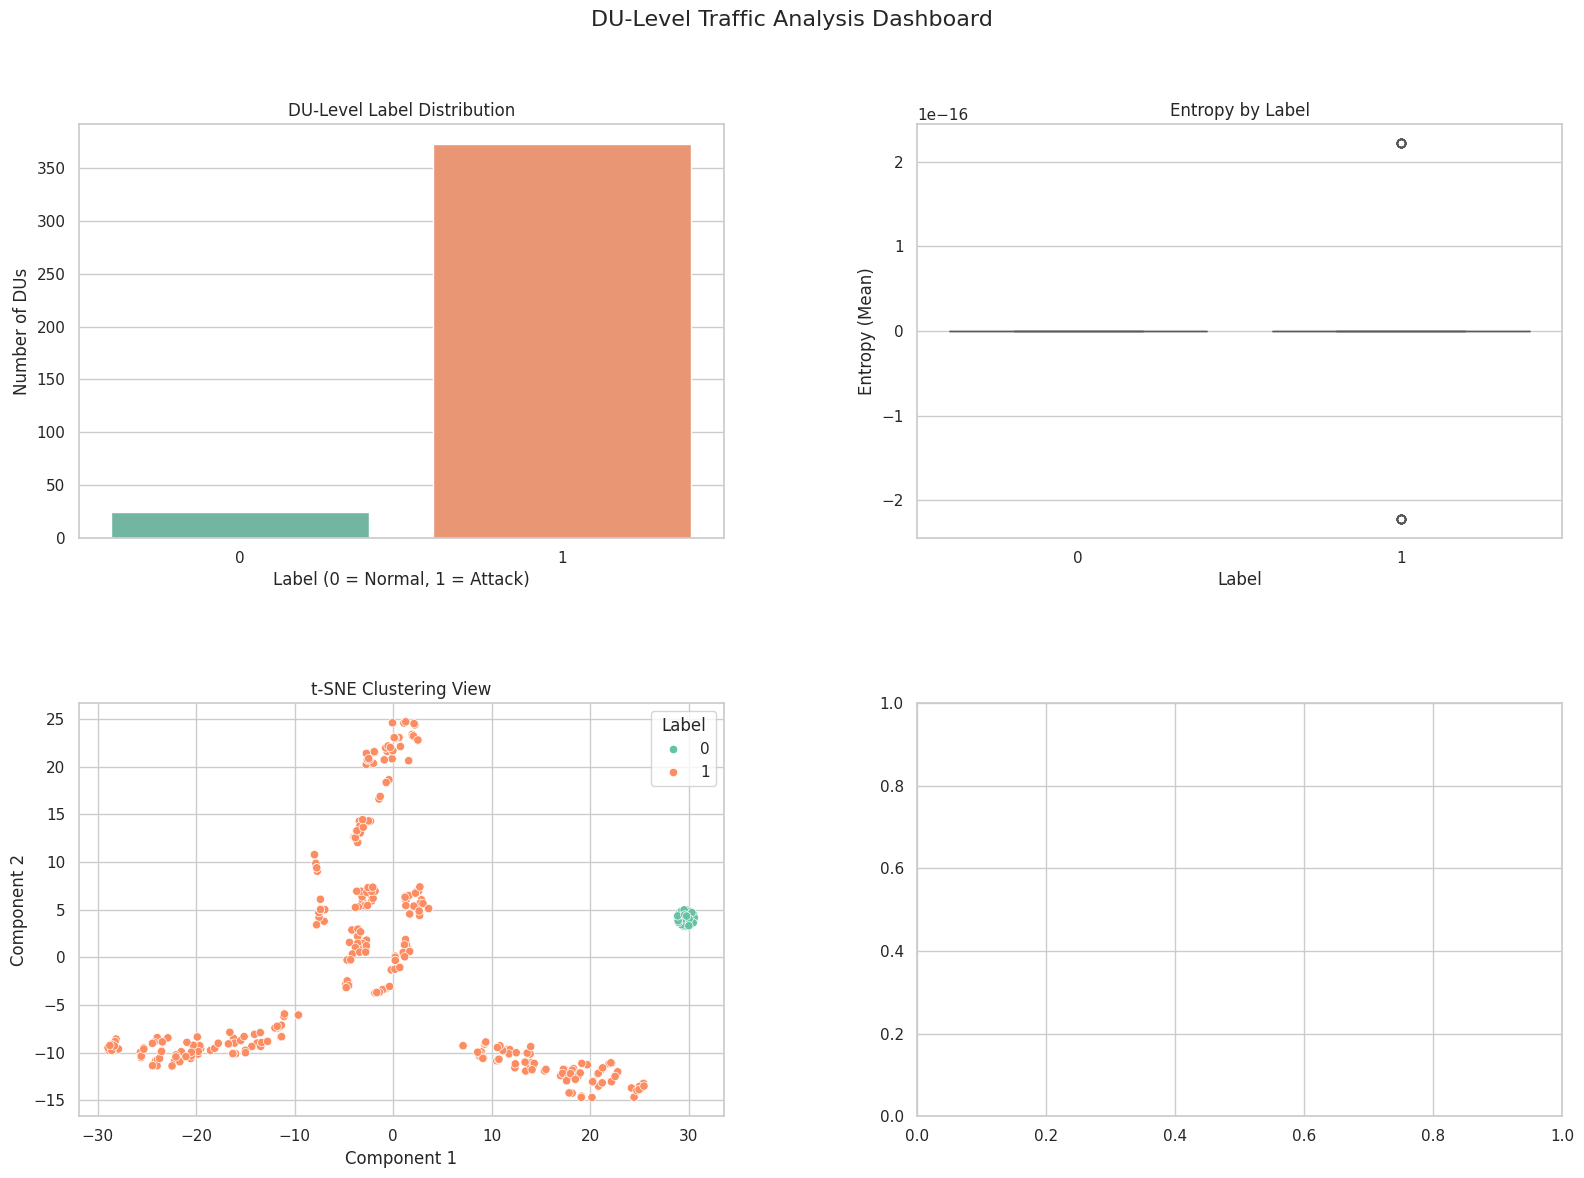

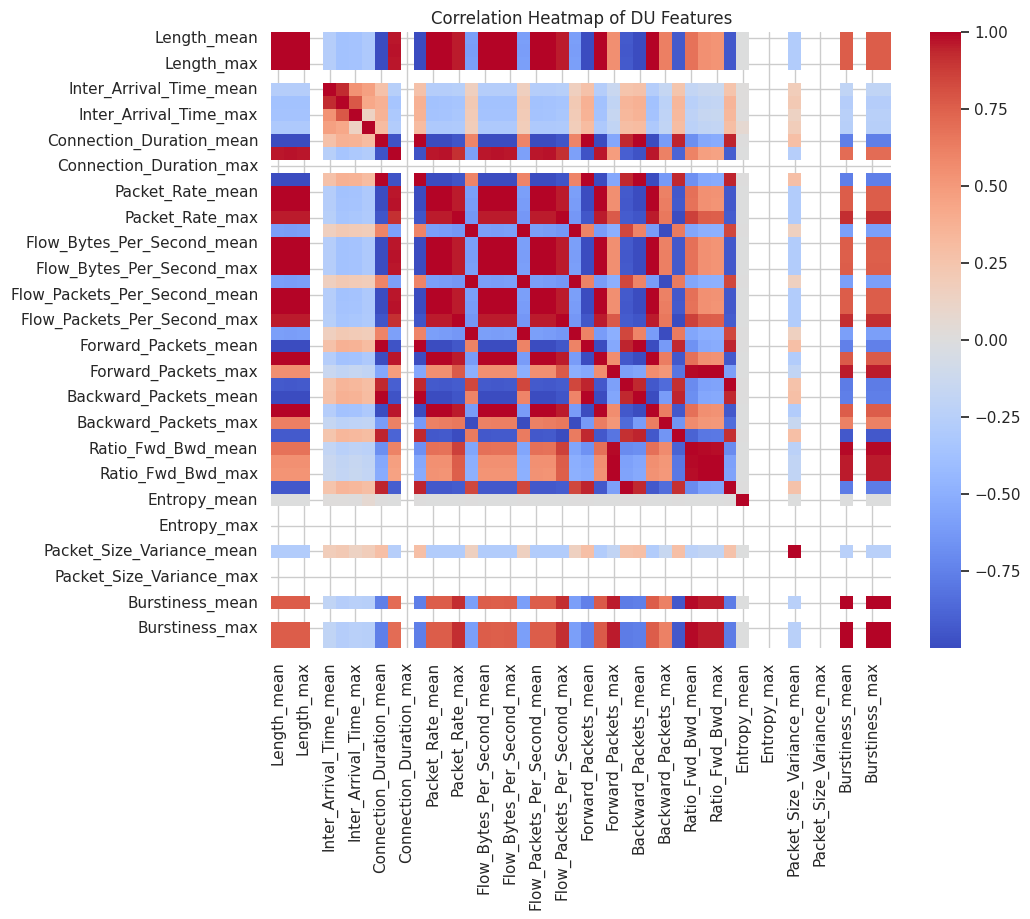

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings("ignore")

# Set plot style
sns.set(style="whitegrid")

# Create a dashboard layout
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('DU-Level Traffic Analysis Dashboard', fontsize=16)

# --- 1. Label Distribution (Top Left) ---
sns.countplot(x='Label', data=X_scaled_data, ax=axs[0, 0], palette='Set2')
axs[0, 0].set_title("DU-Level Label Distribution")
axs[0, 0].set_xlabel("Label (0 = Normal, 1 = Attack)")
axs[0, 0].set_ylabel("Number of DUs")

# --- 2. Boxplot: Entropy vs Label (Top Right) ---
sns.boxplot(x='Label', y='Entropy_mean', data=X_scaled_data, ax=axs[0, 1], palette='Set2')
axs[0, 1].set_title("Entropy by Label")
axs[0, 1].set_ylabel("Entropy (Mean)")
axs[0, 1].set_xlabel("Label")

# --- 3. t-SNE Visualization (Bottom Left) ---
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X_scaled_data.drop(columns=['DU_ID', 'Label']))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=X_scaled_data['Label'], ax=axs[1, 0], palette='Set2')
axs[1, 0].set_title("t-SNE Clustering View")
axs[1, 0].set_xlabel("Component 1")
axs[1, 0].set_ylabel("Component 2")
axs[1, 0].legend(title='Label')

# --- 4. Correlation Heatmap (Bottom Right, full plot) ---
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust spacing
plt.subplots_adjust(wspace=0.3, hspace=0.4)  # Adjust gaps

# Separate plot due to size
plt.figure(figsize=(10, 8))
sns.heatmap(X_scaled_data.drop(columns=['DU_ID', 'Label']).corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap of DU Features")
plt.show()


In [ ]:
# Calculate Number of Neurons using Maximum Distance Rule

from scipy.spatial.distance import euclidean
from sklearn.metrics import silhouette_score

# Threshold Ratio can be 0.5 or 0.6
def calculate_optimal_neurons(X_scaled, threshold_ratio=0.3):
    centers = [X_scaled[0]] # First center
    # Find second center: farthest from the first
    max_dist = 0
    second = X_scaled[1]
    for row in X_scaled:
      dist = euclidean(row, centers[0])
      if dist > max_dist:
        max_dist = dist
        second = row

    centers.append(second)

    while True:
      min_dists = [min([euclidean(row, center) for center in centers]) for row in X_scaled]
      D_max = max(min_dists)
      if D_max > threshold_ratio * euclidean(centers[0], centers[1]):
        new_center = X_scaled[np.argmax(min_dists)]
        centers.append(new_center)
      else:
        break

    return len(centers), np.array(centers)

# Apply function

X_array = X_scaled_data.drop(columns=['DU_ID', 'Label']).values
# Test multiple threshold ratios
best_ratio = 0.5
best_score = -1
for ratio in [0.3, 0.5, 0.7]:
    num_neurons, centers = calculate_optimal_neurons(X_array, threshold_ratio=ratio)
    # Quick clustering to evaluate
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=num_neurons, init=centers, n_init=1, random_state=42)
    labels = kmeans.fit_predict(X_array)
    score = silhouette_score(X_array, labels)
    print(f"Threshold {ratio}: {num_neurons} neurons, Silhouette Score: {score}")
    if score > best_score:
        best_score = score
        best_ratio = ratio

num_neurons, initial_centers = calculate_optimal_neurons(X_array, threshold_ratio=best_ratio)
print(f"Optimal number of neurons: {num_neurons}")


Threshold 0.3: 2 neurons, Silhouette Score: 0.998469801851154
Threshold 0.5: 2 neurons, Silhouette Score: 0.998469801851154
Threshold 0.7: 2 neurons, Silhouette Score: 0.998469801851154
Optimal number of neurons: 2


In [ ]:
# Adaptive Kohonen Network Clustering

from sklearn.metrics.pairwise import euclidean_distances

def kohonen_clustering(X, initial_centers, num_epochs=50, initial_lr=0.5):
    weights = initial_centers.copy()
    num_neurons = len(weights)
    sigma = num_neurons / 2
    sigma_decay = sigma / num_epochs
    for epoch in range(num_epochs):
        lr = initial_lr * np.exp(-epoch / num_epochs)
        sigma = sigma - sigma_decay * epoch
        for x in X:
            distances = euclidean_distances([x], weights).flatten()
            winner_idx = np.argmin(distances)
            for j in range(num_neurons):
                dist_to_winner = np.abs(j - winner_idx)
                influence = np.exp(-dist_to_winner**2 / (2 * sigma**2))
                weights[j] += lr * influence * (x - weights[j])
    assignments = [np.argmin(euclidean_distances([x], weights)) for x in X]
    return assignments, weights

cluster_labels, final_weights = kohonen_clustering(X_array, initial_centers)
X_scaled_data['Cluster'] = cluster_labels

# Evaluate clustering
from sklearn.metrics import silhouette_score
score = silhouette_score(X_array, cluster_labels)
print("AKN Clustering Completed.")
print(f"Clustering Silhouette Score: {score}")

AKN Clustering Completed.
Clustering Silhouette Score: 0.16122353068044848


MAD Scores Computed.


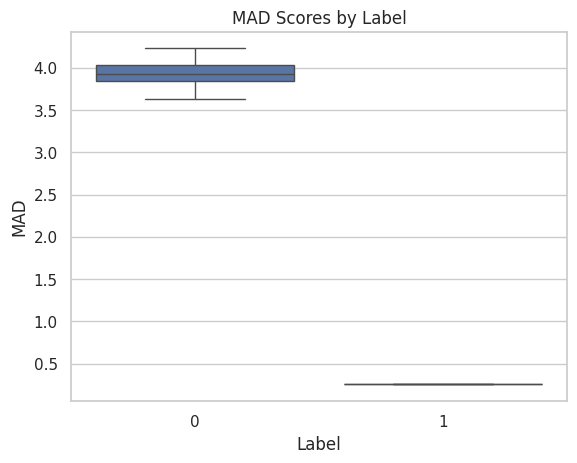

In [ ]:
# Compute MAD (Multivariate Anomaly Degree)

from scipy.stats import variation, pearsonr
import pywt

# Compute sequence-based entropy
def compute_du_entropy(group):
    signal = group['Length'].values
    if len(signal) < 2:
        return 0
    wp = pywt.WaveletPacket(data=signal, wavelet='db1', mode='symmetric', maxlevel=3)
    energies = [np.sum(np.square(node.data)) for node in wp.get_level(3)]
    total_energy = np.sum(energies)
    probs = np.array(energies) / (total_energy + 1e-10)
    return -np.sum(probs * np.log2(probs + 1e-10))

entropy_per_du = data.groupby('DU_ID').apply(compute_du_entropy)
X_scaled_data['Entropy_DU'] = X_scaled_data['DU_ID'].map(entropy_per_du)

# Compute normalized MAD
mean_C = (X_scaled_data['Length_std'] / (X_scaled_data['Length_mean'] + 1e-10)).mean()
std_C = (X_scaled_data['Length_std'] / (X_scaled_data['Length_mean'] + 1e-10)).std()
mean_H = X_scaled_data['Entropy_DU'].mean()
std_H = X_scaled_data['Entropy_DU'].std()

mad_scores = []
for _, row in X_scaled_data.iterrows():
    C = (row['Length_std'] / (row['Length_mean'] + 1e-10) - mean_C) / (std_C + 1e-10)
    H = (row['Entropy_DU'] - mean_H) / (std_H + 1e-10)
    mad = np.sqrt(0.5 * C**2 + 0.5 * H**2)
    mad_scores.append(mad)
X_scaled_data['MAD'] = mad_scores

print("MAD Scores Computed.")
# Visualize MAD
sns.boxplot(x='Label', y='MAD', data=X_scaled_data)
plt.title("MAD Scores by Label")
plt.show()

In [ ]:
# # Detect LDoS Bursts Based on Thresholds

# # Using MAD threshold and cluster purity

# from sklearn.metrics import classification_report

# # Step 1: MAD threshold
# z = 0.5    # Keep z_score between 0.5 and 1.0
# LMAD = np.mean(X_scaled_data['MAD']) + z * np.std(X_scaled_data['MAD'])

# # Step 2: Label abnormal DUs
# X_scaled_data['Abnormal_DU'] = (X_scaled_data['MAD'] > LMAD).astype(int)

# # Step 3: Cluster-level voting (LADUR)
# LADUR_THRESHOLD = 0.4   # 0.3 or 0.4
# cluster_votes = X_scaled_data.groupby('Cluster')['Abnormal_DU'].mean()
# abnormal_clusters = cluster_votes[cluster_votes >= LADUR_THRESHOLD].index

# X_scaled_data['Predicted_Label'] = X_scaled_data['Cluster'].apply(lambda c: 1 if c in abnormal_clusters else 0)
# print("Detection Evaluation:\n")
# print(classification_report(X_scaled_data['Label'], X_scaled_data['Predicted_Label']))

Detection Evaluation:

              precision    recall  f1-score   support

           0       0.06      1.00      0.11        24
           1       0.00      0.00      0.00       373

    accuracy                           0.06       397
   macro avg       0.03      0.50      0.06       397
weighted avg       0.00      0.06      0.01       397



In [ ]:
from sklearn.metrics import classification_report

# Optimize MAD threshold
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(X_scaled_data['Label'], X_scaled_data['MAD'])
optimal_idx = np.argmax(tpr - fpr)
optimal_z = (thresholds[optimal_idx] - X_scaled_data['MAD'].mean()) / X_scaled_data['MAD'].std()
LMAD = X_scaled_data['MAD'].mean() + optimal_z * X_scaled_data['MAD'].std()
X_scaled_data['Abnormal_DU'] = (X_scaled_data['MAD'] > LMAD).astype(int)

# Optimize LADUR threshold
best_ladur = 0.4
best_f1 = 0
for ladur in [0.3, 0.4, 0.5]:
    cluster_votes = X_scaled_data.groupby('Cluster')['Abnormal_DU'].mean()
    abnormal_clusters = cluster_votes[cluster_votes >= ladur].index
    X_scaled_data['Predicted_Label'] = X_scaled_data['Cluster'].apply(lambda c: 1 if c in abnormal_clusters else 0)
    report = classification_report(X_scaled_data['Label'], X_scaled_data['Predicted_Label'], output_dict=True)
    f1 = report['weighted avg']['f1-score']
    if f1 > best_f1:
        best_f1 = f1
        best_ladur = ladur

# Final detection
LMAD = X_scaled_data['MAD'].mean() + optimal_z * X_scaled_data['MAD'].std()
X_scaled_data['Abnormal_DU'] = (X_scaled_data['MAD'] > LMAD).astype(int)
cluster_votes = X_scaled_data.groupby('Cluster')['Abnormal_DU'].mean()
abnormal_clusters = cluster_votes[cluster_votes >= best_ladur].index
X_scaled_data['Predicted_Label'] = X_scaled_data['Cluster'].apply(lambda c: 1 if c in abnormal_clusters else 0)
print("Final Detection Evaluation:\n")
print(classification_report(X_scaled_data['Label'], X_scaled_data['Predicted_Label']))

# Try supervised model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_array, X_scaled_data['Label'], test_size=0.2, random_state=42)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
print("Random Forest Evaluation:\n")
print(classification_report(y_test, rf.predict(X_test)))

Final Detection Evaluation:

              precision    recall  f1-score   support

           0       0.06      1.00      0.11        24
           1       0.00      0.00      0.00       373

    accuracy                           0.06       397
   macro avg       0.03      0.50      0.06       397
weighted avg       0.00      0.06      0.01       397

Random Forest Evaluation:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        72

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

